<a href="https://colab.research.google.com/github/verma395/Chessboard/blob/main/Assignment2_IT7103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Anu Kumari Verma**

**Course Name : IT7103 Practical Data Analytics**

**Instructor Name: Dr. Chen Ying**

Question 1: Load the data into a Python session as a Pandas DataFrame. Verify that all columns have the correct data types, and fix incorrect ones if necessary.
----------------------------------------------------------------

In [25]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

#Answer 1
#---------
auto_mpg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto-mpg.csv')
auto_mpg.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [26]:
#code for verifying Data Type
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


**Note: For auto-mpg.csv all data types are correct.**

**Question 2 :Split the data 75% training and 25% testing.**
-----------------------------------------------------------

In [27]:
#Answer 2
#-----------
from sklearn.model_selection import train_test_split

#Test_size=0.25 means that 25% of data will be for testing, 75% for training

traindata, testdata = train_test_split(auto_mpg, test_size=0.25)
traindata.shape, testdata.shape

((298, 9), (100, 9))

**Question 3. Visualize necessary columns in the data.**
-------------------------------------------------

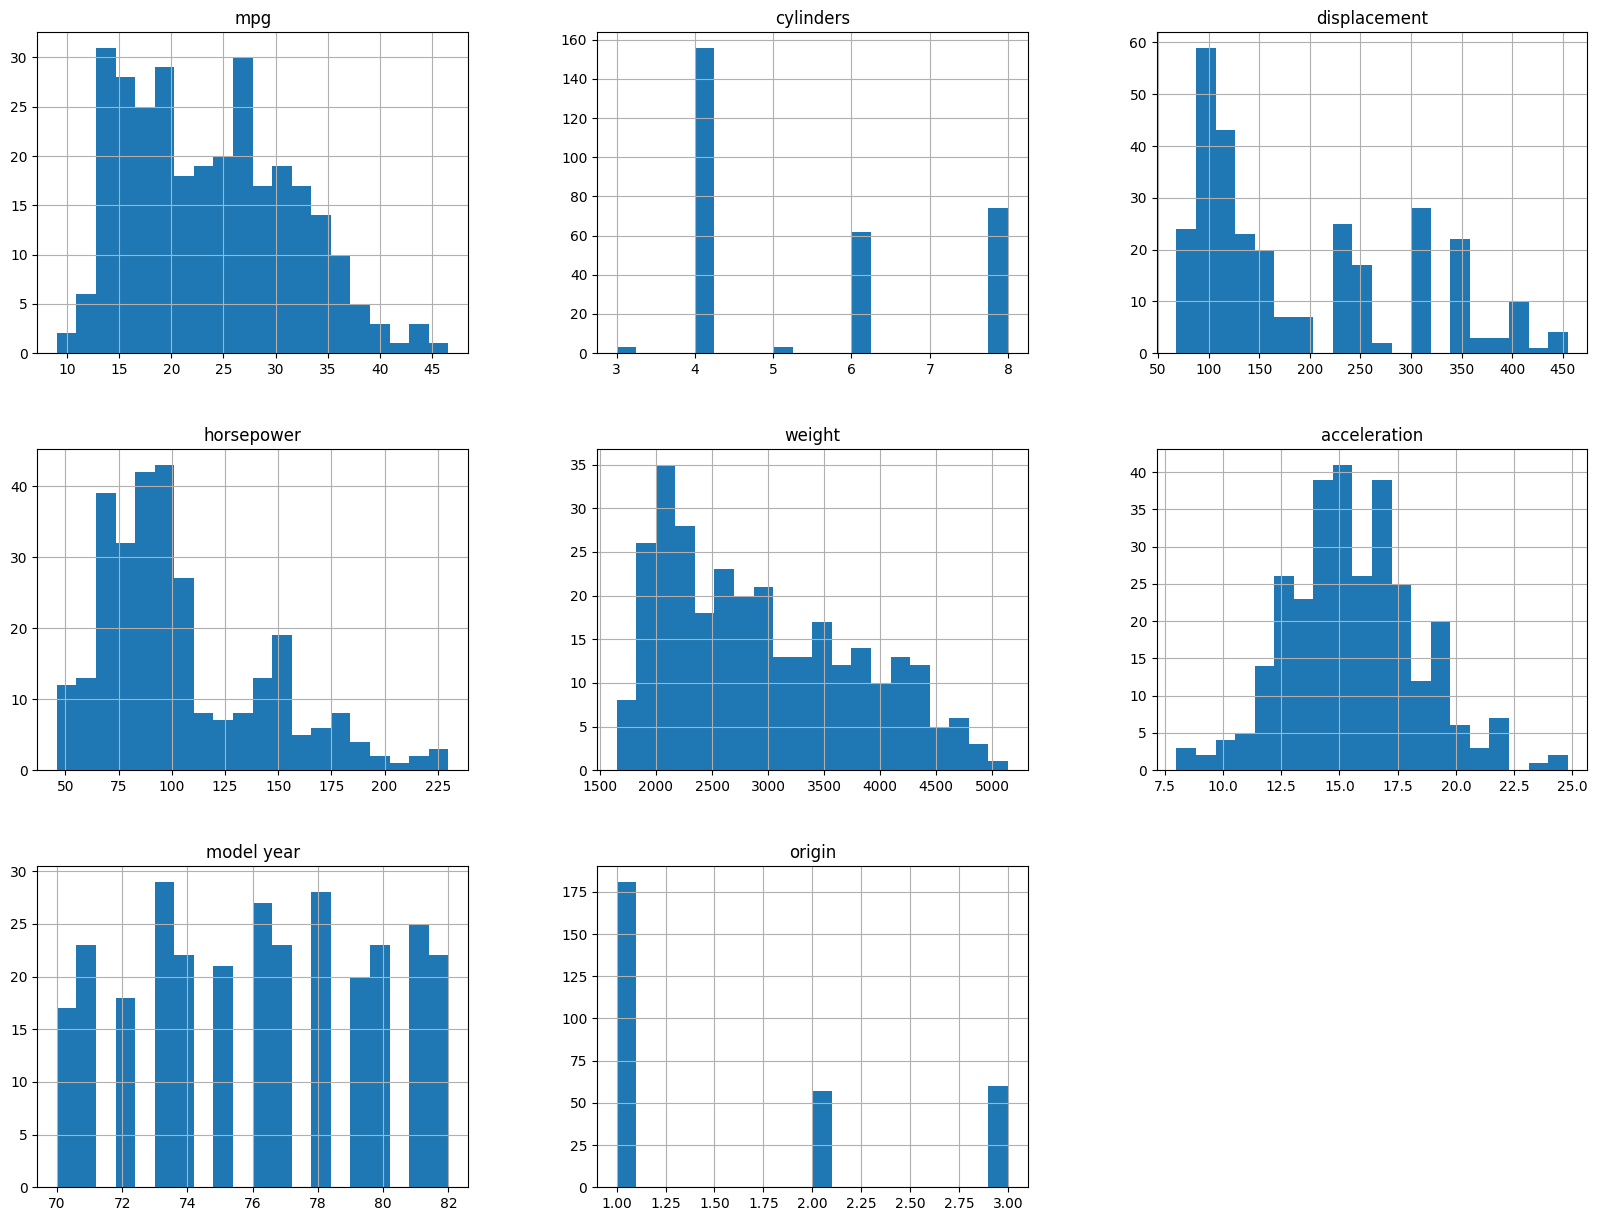

In [28]:
#Answer 3
#----------
from matplotlib import pyplot as plt

# Data in histograms

traindata.hist(bins=20, figsize=(20,15))
plt.show()

In [29]:
# To know the int and float column
num_cols = [column for column in auto_mpg.columns if (traindata[column].dtypes == np.int64) or (traindata[column].dtypes == np.float64)]
num_cols

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin']

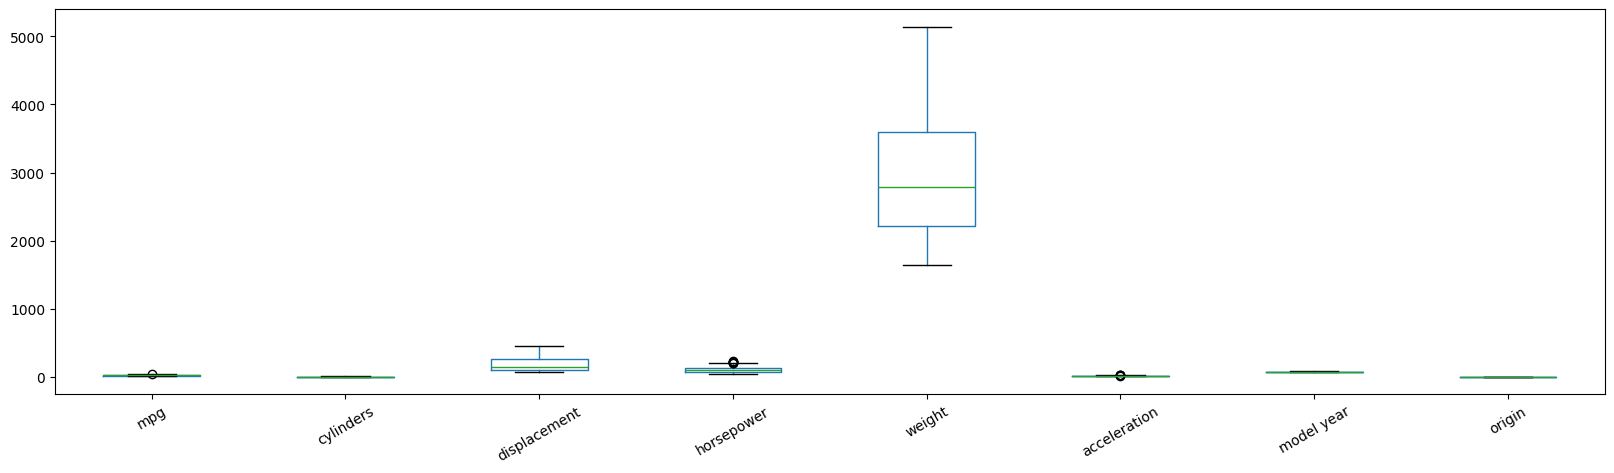

In [30]:
#For Box Plot graph
traindata[num_cols].boxplot(grid=False, figsize=(20,5), rot=30)
plt.show()

In [31]:
#To know data type which is an object
cat_cols = [column for column in traindata.columns if traindata[column].dtypes == object]
cat_cols

['car name']

In [32]:
 #This list is for symmetric distribution
num_cols = ['mpg', 'weight','acceleration']

#This list is for skewed distribution

log_cols = ['cylinders','displacement','origin', 'horsepower', 'model year' ]

#This list is for categorical distribution
cat_cols = ['car name']

Question 4.Build a pipeline.
----------------------

In [33]:
#Answer 4

from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

def log_transformation(x):
    return np.log(x+0.1)

log_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('log transform', FunctionTransformer(log_transformation)),
    ('standardize', StandardScaler())
])


processing_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, num_cols),
    ('log', log_pipeline, log_cols),
    ('class', OneHotEncoder(max_categories=3, handle_unknown='infrequent_if_exist'), cat_cols)
  ])

processing_pipeline

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['mpg', 'weight', 'acceleration']),
                                ('log',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('log transform',
                                                  FunctionTransformer(func=<function log_transformation at 0x7900ee398360>)),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['cylinders', 'displacement', 'origin',
                                  'horsepower', 'model year']),
                                ('class',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               max_categories=3),
                                 ['car name'])])

Question 5: Train the pipeline on the training data. Then perform transformation on the training data and test data.
---------------------------------------------------------------

In [34]:
#Answer 5

train_features = processing_pipeline.fit_transform(traindata)
test_features = processing_pipeline.transform(testdata)



Question 6: Print the shape of the processed training data and processed test data.
---------------------------------------------------------------

In [35]:
# Answer 6

train_features.shape

(298, 11)

In [36]:
test_features.shape

(100, 11)